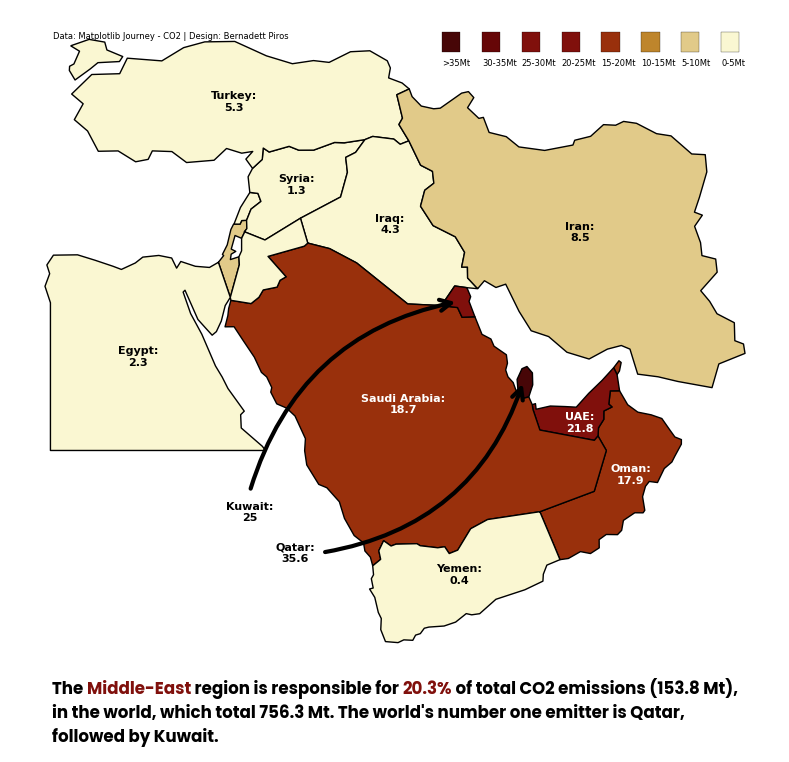

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from pypalettes import load_cmap
from drawarrow import fig_arrow, ax_arrow
from pyfonts import load_font
from highlight_text import fig_text, ax_text

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(url)

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/CO2/CO2.csv"
df = pd.read_csv(url)

world = world.merge(df, left_on="code_adm", right_on="ISO")

world["name"] = world["name"].replace({"United Arab Emirates": "UAE"})

middle_east = ["Egypt", "Iran", "Turkey", "Iraq", "Saudi Arabia", "Yemen",
               "Syria", "Jordan", "United Arab Emirates", "Israel", "Lebanon",
               "Oman", "Kuwait", "Qatar"]

df = world[world["Country"].isin(middle_east)]

df = df.copy()

countries = ["Egypt", "Iran", "Turkey", "Iraq", "Saudi Arabia", "Yemen", "Syria", "Oman", "UAE"]

adj = {
    'UAE': (0, -0.5),
    'Oman': (0.9, 0.17),    
}
cmap = load_cmap("Naturaleza") 

font = load_font(
  font_url="https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-Bold.ttf?raw=true"
)

fig, ax = plt.subplots(figsize=(8, 8),layout="tight")
df.plot(column="Total", cmap=cmap, ec="black", lw=1, ax=ax)

ax.set_axis_off()

value_ranges = [1, 3, 5, 7, 9, 11, 13, 15, 17]
labels = ['0-5Mt','5-10Mt', '10-15Mt', '15-20Mt', '20-25Mt', '25-30Mt', '30-35Mt', '>35Mt']

rectangle_width = 1
rectangle_height = 1
legend_x = 62
legend_y_start = 41.5
legend_y_step = 2.2

for i in range(len(labels)):  
    value = (value_ranges[i] + value_ranges[i + 1]) / 2 / value_ranges[-1]    
    color = cmap(value)
    ax.add_patch(plt.Rectangle(
        (legend_x - i * legend_y_step, legend_y_start), 
        rectangle_width, rectangle_height, color=color, ec='black', lw=0.2, clip_on=False))
    ax.text(legend_x - i * legend_y_step,
            legend_y_start - 0.5,
            labels[i], 
            fontsize=6, va='center')

df_proj = df.to_crs(epsg=3832)
df_proj['centroid'] = df_proj.geometry.centroid
df.loc[:, 'centroid'] = df_proj['centroid'].to_crs(df.crs)

for country in countries:
    country_data = df.loc[df['name'] == country, 'centroid']
    centroid = country_data.iloc[0]
    x, y = centroid.coords[0]
    dx, dy = adj.get(country, (0, 0))
    x += dx
    y += dy
    value = df.loc[df['name'] == country, 'Total'].iloc[0]
    color_text = 'white' if value > 15 else 'black'
    ax.text(
        x=x,
        y=y,
        s=f"{country}:\n{value:.1f}",
        fontsize=8,
        color=color_text,
        weight='bold',
        ha='center',
        va='center')

qatar = df.loc[df['name'] == 'Qatar', 'Total'].iloc[0]
ax_arrow(tail_position=(40, 17),
         head_position=(51.1, 25.4),
         color='black',
         width=3,
         fill_head=False,
         radius=0.3)
ax.text(s=f"Qatar:\n{qatar:.1f}",
        x=38.5,
        y=17,
        fontsize=8,
        weight='bold',
        ha='center',
        va='center')

kuwait = df.loc[df['name'] == 'Kuwait', 'Total'].iloc[0]
ax_arrow(tail_position=(36, 20),
         head_position=(47.5, 29.3),
         color='black',
         width=3,
         fill_head=False,
         radius=-0.3)

ax.text(s=f"Kuwait:\n{kuwait:.0f}",
        x=36,
        y=19,
        fontsize=8,
        weight='bold',
        ha='center',
        va='center')

regional_em = df['Total'].sum()
global_em = world['Total'].sum()
ratio = (regional_em/global_em)*100

title_text = (f"The <Middle-East> region is responsible for <{ratio:.1f}%> of total CO2 emissions ({regional_em:.1f} Mt),\n"
              f"in the world, which total {global_em:.1f} Mt. The world's number one emitter is Qatar,\n"
              f"followed by Kuwait.")

#wrapped_text = "\n".join(textwrap.wrap(title_text, width=60))

fig_text(s=title_text,
         x=0.5,
         y=0.1,
         font=font,
         fontsize=12,
         weight='bold',
         ha='center',
         ax=ax,
         highlight_textprops=[
             {'color': '#80100CFF'},
             {'color': '#80100CFF'}])

fig.text(0.22, 0.9, "Data: Matplotlib Journey - CO2 | Design: Bernadett Piros",
         size=6, ha="center")
    
plt.show()

#plt.savefig("choropleth_map_CO2", dpi=300, bbox_inches='tight', pad_inches=0.2)
#plt.savefig("choropleth_map_CO2",bbox_inches='tight', pad_inches=0.2)